In [14]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import linregress
from scipy.signal import butter,filtfilt, find_peaks

In [15]:
###### TO CHANGE
# Import data
# First: n = 70 & m = 660
# Second: n = 1120 & m = 1750
# Third: n = 2330 & m = 3030
# Fourth: n = 3700 & m = 4470
# Fifth: n = 5200 & m = 6500


n = 5200
m = 6250

# First: lim1 = 40 & lim2 = 65
# Second: lim1 = 55 & lim2 = 95
# Third: lim1 = 55 & lim2 = 120
# Fourth: lim1 = 70 & lim2 = 150
# Fifth: lim1 = 80 & lim2 = 170

lim1 = 80
lim2 = 170

disp = 0.4

In [16]:
df_exp_PB = pd.read_csv('PB19_TRI_16622.csv')                                                            # Read the file
df_exp_PB_1 = df_exp_PB.iloc[n:m]

stress1 = df_exp_PB_1['Stress [MPa]']             # Apply filter to stress
strain1 = df_exp_PB_1['Strain Ax [-]']            # Apply filter to strain

# print(CP)

stress2 = stress1.to_numpy()
strain2 = strain1.to_numpy()


stress_range = stress1[(stress1 >= lim1) & (stress1 <= lim2)]                               # stress filtered for values more than 15 less 33
strain_range = strain1[(stress1 >= lim1) & (stress1 <= lim2)]                               # strain filtered for values more than 15 less 33

stress_range1 = stress_range.to_numpy()
strain_range1 = strain_range.to_numpy()

LVDT1_1 = df_exp_PB['LVDT1']
LVDT2_2 = df_exp_PB['LVDT2']
LVDT1 = LVDT1_1.to_numpy()
LVDT2 = LVDT2_2.to_numpy()
LVDT1_min = LVDT1.min()
LVDT2_min = LVDT2.min()
sample_length = 70
LVDT1_norm = np.array(())
LVDT2_norm = np.array(())
LVDT_avg = np.array(())
Strain_LVDT = np.array(())

for value in range(len(LVDT1)):
    LVDT1_norm = np.append(LVDT1_norm, LVDT1[value] - LVDT1_min)
    LVDT2_norm = np.append(LVDT2_norm, LVDT2[value] - LVDT2_min)

    LVDT_avg = np.append(LVDT_avg, (LVDT1_norm[value] + LVDT2_norm[value])/2)

    Strain_LVDT = np.append(Strain_LVDT, LVDT_avg[value]/sample_length)


# print(Strain_LVDT)

In [17]:
stress_range1 = stress_range.to_numpy()
# strain_range1 = strain_range.to_numpy()

# stress_range1 = stress2
strain_range1 = strain2

CP = df_exp_PB_1['IPress']/10
CP1 = CP.to_numpy()
# print(CP1)

# Correction
# print(CP)
strain_rock = np.array(())
strain_machine = np.array(())
for value in range(len(stress_range1)):
    if (CP1[value] == 10):
        p = 3.671e+04
    elif (CP1[value] == 20):
        p = 4.305e+04
    elif (CP1[value] == 30):
        p = 4.8e+04
    elif (CP1[value] == 40):
        p = 5.107e+04
    elif (CP1[value] == 50):
        p = 5.316e+04

    strain_rock=np.append(strain_rock, strain_range1[value] - (stress_range1[value]/p))
    strain_machine=np.append(strain_machine, strain_range1[value] - strain_rock)

print(strain_rock)
E_rock = linregress(strain_rock,stress_range1)
print(E_rock)
Linfit = E_rock[0]*(strain1) + E_rock[1]

corr_matrix = np.corrcoef(strain_rock, stress_range1)
corr = corr_matrix[0,1]
R_sq = corr**2
print(R_sq)

### Plot specific cycle
fig = go.Figure()
fig.add_trace(go.Scatter(name='Strain sample', x=strain_rock, y=stress_range1))
fig.add_trace(go.Scatter(name='Total Strain', x=strain1, y=stress1))
# fig.add_trace(go.Scatter(name='Strain Machine', x=strain_machine, y=stress_range1))
fig.add_trace(go.Scatter(name='Strain Machine', x=strain1, y=Linfit))
fig.update_layout(template="simple_white", showlegend=True, autosize=False, width=700, height=700, 
    title="First cycle",
    xaxis_title="Strain Ax [-]",
    yaxis_title="Stress [MPa]",
    font=dict(
        family="New Times Roman",
        size=20,
        color="Black"),
    legend=dict(title=None, orientation='h', y=1, yanchor="bottom", x=1, xanchor="right", font=dict(size = 16), bordercolor='black', borderwidth=1))

fig.update_yaxes(showgrid=True)
fig.update_xaxes(showgrid=True)

fig.show()

np.savetxt('sample.txt',strain_rock)

[0.00554257 0.00556087 0.0055682  0.00557518 0.00558836 0.00558842
 0.00560309 0.00561176 0.00561954 0.00563113 0.00564156 0.00565359
 0.00566205 0.00567097 0.00567681 0.00568923 0.00569762 0.0057052
 0.00571324 0.00572767 0.00574436 0.00575364 0.00576276 0.00577262
 0.00578248 0.00579303 0.00580057 0.00580873 0.00581753 0.00582808
 0.00583695 0.00584694 0.00585419 0.00586184 0.00589807 0.00589644
 0.00590359 0.00590367 0.00591726 0.00593231 0.0059559  0.00595651
 0.00596068 0.00597271 0.00598367 0.00599041 0.00600126 0.00600914
 0.00601757 0.00602836 0.00604334 0.00605286 0.00606008 0.00607083
 0.00607946 0.00608798 0.00609018 0.00609486 0.00611147 0.0061252
 0.00611869 0.00613531 0.0061531  0.00615375 0.006168   0.00621379
 0.00620198 0.00621453 0.00622907 0.00623247 0.00623931 0.00625143
 0.00626053 0.00626847 0.00627793 0.00628783 0.00629907 0.00630359
 0.00631097 0.00631849 0.00632672 0.00636325 0.00636422 0.00637332
 0.00638098 0.00639186 0.00639902 0.00640618 0.00641413 0.006422

In [18]:
## Deformtion
result = []

for value in strain_rock:
    L = 69.85/1000                        # Length of the sample that is being studied in m
    deformation = (1-value)*L
    result += [deformation]
print(result)

[0.06946285168233088, 0.06946157320632317, 0.06946106148517062, 0.0694605733366849, 0.06945965317383296, 0.06945964857971068, 0.06945862421448157, 0.0694580185017184, 0.0694574754053544, 0.069456665899829, 0.06945593720323777, 0.069455096476234, 0.0694545060379682, 0.06945388255550168, 0.06945347503462397, 0.06945260755202182, 0.06945202131342813, 0.06945149144467795, 0.06945093042067287, 0.06944992222763713, 0.06944875628449944, 0.06944810830407694, 0.06944747101664353, 0.06944678255370484, 0.06944609351735496, 0.06944535674701824, 0.06944482990772931, 0.06944425988758032, 0.0694436452580363, 0.06944290832687114, 0.06944228917757486, 0.06944159111985308, 0.06944108486423965, 0.06944055058400733, 0.06943801960000394, 0.06943813375298401, 0.06943763424664653, 0.06943762899922441, 0.06943667973010346, 0.06943562794861793, 0.06943398057105643, 0.06943393761567156, 0.06943364658583051, 0.06943280629926542, 0.06943204048993434, 0.0694315698331185, 0.06943081195930455, 0.06943026170633766, 0

In [19]:
###ONLY FOR LINEAR REGRESSION
# Plot the young modulus slope
# stress_range = stress1[(stress1 >= lim1) & (stress1 <= lim2)]                               # stress filtered for values more than 15 less 33
# strain_range = strain1[(stress1 >= lim1) & (stress1 <= lim2)]                               # strain filtered for values more than 15 less 33


## Linear regression to fit the linear slope corresponding to the Young's
linear_regression_output = linregress(strain_range, stress_range)
print(linear_regression_output)
E = linear_regression_output[0]
b = linear_regression_output[1]
ElasticM = f'The elastic modulus is {round(E_rock[0]/1000,1)} GPa'
print(ElasticM)
stress_offset = E*(strain1) + b - disp                                                                # y=mx+b


# print(len(strain1))
# # print(range(1,len(strain1)))
# print(len(stress_offset))
# print(len(stress1))

## Find yield strength
for i in range(n, m):
    if stress_offset[i] >= stress1[i]:
        sx1 = strain1[i-1]
        sy1 = stress1[i-1]
        sy2 = stress1[i]
        sx2 = strain1[i]

        ox1 = strain1[i-1]
        oy1 = stress_offset[i-1]
        ox2 = stress1[i]
        oy2 = stress_offset[i]
        break

# print(sx1, sy1, sx2, sy2, ox1, oy1, ox2, oy2)

x1 = ox1
y1 = oy1
x2 = ox2
y2 = oy2

x3 = sx1
y3 = sy1
x4 = sx2
y4 = sy2

YS = ( (x1*y2 - y1*x2)*(y3-y4) - (y1-y2)*(x3*y4-y3*x4) ) / ( ( (x1-x2)*(y3-y4))- ( (y1-y2)*(x3-x4)))
print(YS)

xi = (YS-b) / (E)
yi = YS

print('(xi,yi)',xi,yi)

LinregressResult(slope=15579.244132683623, intercept=-46.40847969809582, rvalue=0.9999942327047314, pvalue=0.0, stderr=2.6324411439992104, intercept_stderr=0.029311311893055476)
The elastic modulus is 22.1 GPa
174.99882754552922
(xi,yi) 0.014211684813330301 174.99882754552922


In [20]:
# strain_rock=np.array(())
# E_al=70000  #MPa
# stress_range1 = stress_range.to_numpy()
# strain_range1 = strain_range.to_numpy()

# for value in range(len(stress_range1)):
#     if (stress_range1[value] >= lim1) & (stress_range1[value] <= lim2):
#         p = 4.223e-06*(stress_range1[value])+0.0003365
#     elif (stress_range1[value] >= lim1) & (stress_range1[value] <= lim2):
#         p = 3.761e-06*(stress_range1[value])+0.0003662
#     elif (stress_range1[value] >= lim1) & (stress_range1[value] <= lim2):
#         p = 3.553e-06*(stress_range1[value])+0.000371
#     elif (stress_range1[value] >= lim1) & (stress_range1[value] <= lim2):
#         p = 3.371e-06*(stress_range1[value])+0.0003828
#     elif (stress_range1[value] >= lim1) & (stress_range1[value] <= lim2):
#         p = 3.294e-06*(stress_range1[value])+0.0003833


#     strain_rock=np.append(strain_rock, strain_range1[value] - (1-1/E_al)*p)
# print(strain_rock)
# pd.DataFrame(strain_rock).to_csv("5cycle.csv")
# E_rock = linregress(strain_rock,stress_range1)
# print(E_rock)
# print(strain_range1)
# print(stress_range1/3.671e+04)

In [21]:
# Maximum strength
y = stress2.max()                                                                               # Find maximum stress
max_index = stress2.argmax()
# print(max_index)
x = strain2[max_index]


## Fracture strength: point of strain where the material physically separates. 
# At this point, the strain reaches its maximum value and the material actually fractures, even though the corresponding stress may be less than the ultimate strength at this point

fract_strain =  strain2.max()
max_index_fract = strain2.argmax()
fract_stress = stress2[max_index_fract]
# fract_stress = np.interp(fract_strain, strain1, stress1)
FractS = f'The fracture strength is {round(fract_stress,1)} MPa'
print(fract_strain, fract_stress)

0.02203794 224.851708


In [22]:
### Deviatoric stresses

# sigma1 = stress2
# sigma3 = np.zeros(len(stress2))
# # print(sigma3)
# for i in range(len(sigma1)):
#     if n >= 0 & m <=1300:
#         sigma3[i] = 10
#     elif n >= 2150 & m <=3400:
#         sigma3[i] = 20
#     elif n >= 4450 & m <=5800:
#         sigma3[i] = 30
#     elif n >= 7000 & m <=8500:
#         sigma3[i] = 40
#     else:
#         sigma3[i] = 50

# dev_stress = (sigma1 - sigma3)/2
# print(dev_stress)

In [23]:
### PLOTTING
## Plot the data
fig = go.Figure()
fig.add_trace(go.Scatter(name='LVDTs strain', x=Strain_LVDT, y=df_exp_PB['Stress [MPa]'], marker=dict(color='DarkBlue')))
# fig.add_trace(go.Scatter(name='Comp strain', x=df_exp_PB['Strain Ax [-]'], y=df_exp_PB['Stress [MPa]'], marker=dict(color='Gold')))

fig.update_layout(template="simple_white", showlegend=True, autosize=False, width=700, height=700, 
    # title="First cycle",
    xaxis_title="Strain Ax [-]",
    yaxis_title="Stress [MPa]",
    font=dict(
        family="New Times Roman",
        size=20,
        color="Black"),
    legend=dict(title=None, orientation='h', y=1, yanchor="bottom", x=1, xanchor="right", font=dict(size = 16), bordercolor='black', borderwidth=1))

fig.update_yaxes(showgrid=True)
fig.update_xaxes(showgrid=True)

fig.show()

In [24]:
### PLOTTING
## Plot the data
fig = px.line(df_exp_PB, x = 'Strain Ax [-]', y = 'Stress [MPa]', hover_data=['Index'], width=700, height=700, title='PB19 - Full test', template="simple_white")
fig.update_yaxes(showgrid=True)
fig.update_xaxes(showgrid=True)
fig.update_layout(    yaxis=dict(range=[0, 290]),
    xaxis=dict(range=[0, 0.025]), # customize font and legend orientation & position
    font=dict(
        family="Times New Roman",
        size=20,
        color="Black"),
    legend=dict(title=None, orientation="h", y=1, yanchor="bottom", x=0.5, xanchor="center"))

fig.show()

In [25]:
### Plot loops
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=strain1, y=stress1))

# fig.update_layout(showlegend=False, autosize=False, width=700, height=700, 
#     title="PB19 LOOPs",
#     xaxis_title="Strain Ax [-]",
#     yaxis_title="Stress [MPa]",
#     font=dict(
#         family="New Times Roman",
#         size=15,
#         color="RebeccaPurple"))

# fig.show()

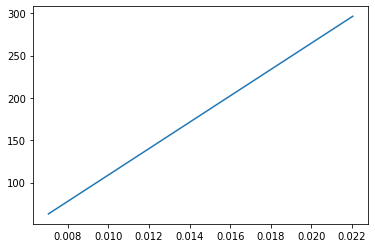

In [26]:
## All info
plt.plot(strain1,stress_offset)
fig = go.Figure()
fig.add_trace(go.Scatter(name='Sample', x=strain1, y=stress1))
fig.add_trace(go.Scatter(name='Linear regression',x=strain1, y=stress_offset))

# Max strength
fig.add_annotation(x=x, y=y,
            text="ε={:.3f}, σ={:.3f}".format(x, y),
            showarrow=True,
            xanchor="right",
            arrowhead=1)

# Elastic Moduli text
fig.add_annotation(x=x, y=100,
            text=ElasticM,
            showarrow=False,
            arrowhead=1)

# Fracture strength text
fig.add_annotation(x=x, y=85,
            text=FractS,
            showarrow=False,
            arrowhead=1)

## Yield point text
fig.update_layout(template="simple_white", showlegend=True, autosize=False, width=700, height=700, 
    title="PB19 - Last cycle",
    xaxis_title="Strain Ax [-]",
    yaxis_title="Stress [MPa]",
    font=dict(
        family="New Times Roman",
        size=20,
        color="Black"),
    legend=dict(title=None, orientation='h', y=1, yanchor="bottom", x=1, xanchor="right", font=dict(size = 16), bordercolor='black', borderwidth=1))

fig.update_yaxes(showgrid=True)
fig.update_xaxes(showgrid=True)


fig.add_annotation(x=xi, y=yi,
            text="ε={:.3f}, σ={:.3f}".format(x1, y1),
            xanchor="right",
            showarrow=True,
            arrowhead=1)

fig.update_traces(textposition='top center')
fig.show()